**Reference**: <https://seaborn.pydata.org/tutorial/axis_grids.html>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Conditional small multiple (`sns.FacetGrid`)

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


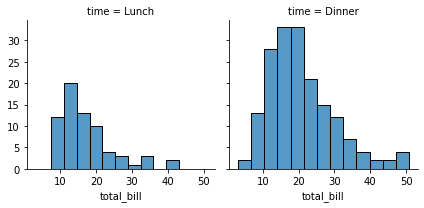

In [3]:
g = sns.FacetGrid(tips, col = 'time')
g.map(sns.histplot, 'total_bill')

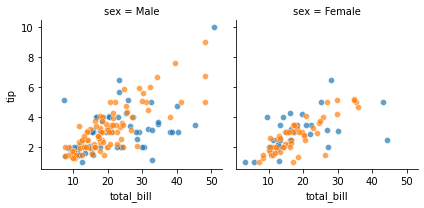

In [9]:
g = sns.FacetGrid(tips, col = 'sex', hue = 'smoker')
g.map(sns.scatterplot, 'total_bill', 'tip', alpha = .7)

There are several options for controlling the look of the grid that can be passed to the class constructor.

/home/trung/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


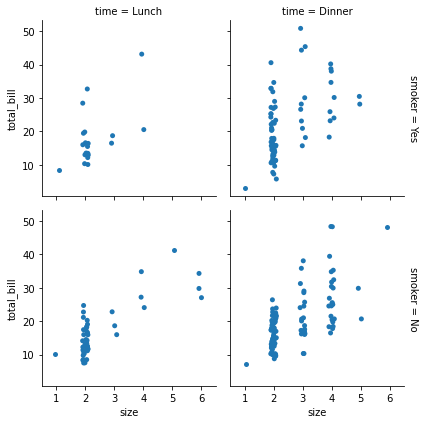

In [14]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker', margin_titles = True)
g.map(sns.stripplot, 'size', 'total_bill')

Note that **`margin_titles`** isn’t formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can’t be used with a legend that lies outside of the plot.

The size of the figure is set by providing the height of each facet, along with the aspect ratio:

/home/trung/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


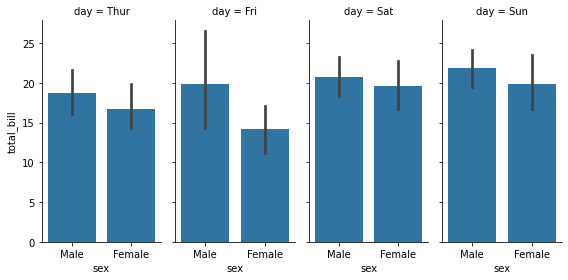

In [15]:
g = sns.FacetGrid(tips, col = 'day', height = 4, aspect = .5)
g.map(sns.barplot, 'sex', 'total_bill')

Specify the order of rows (or columns)

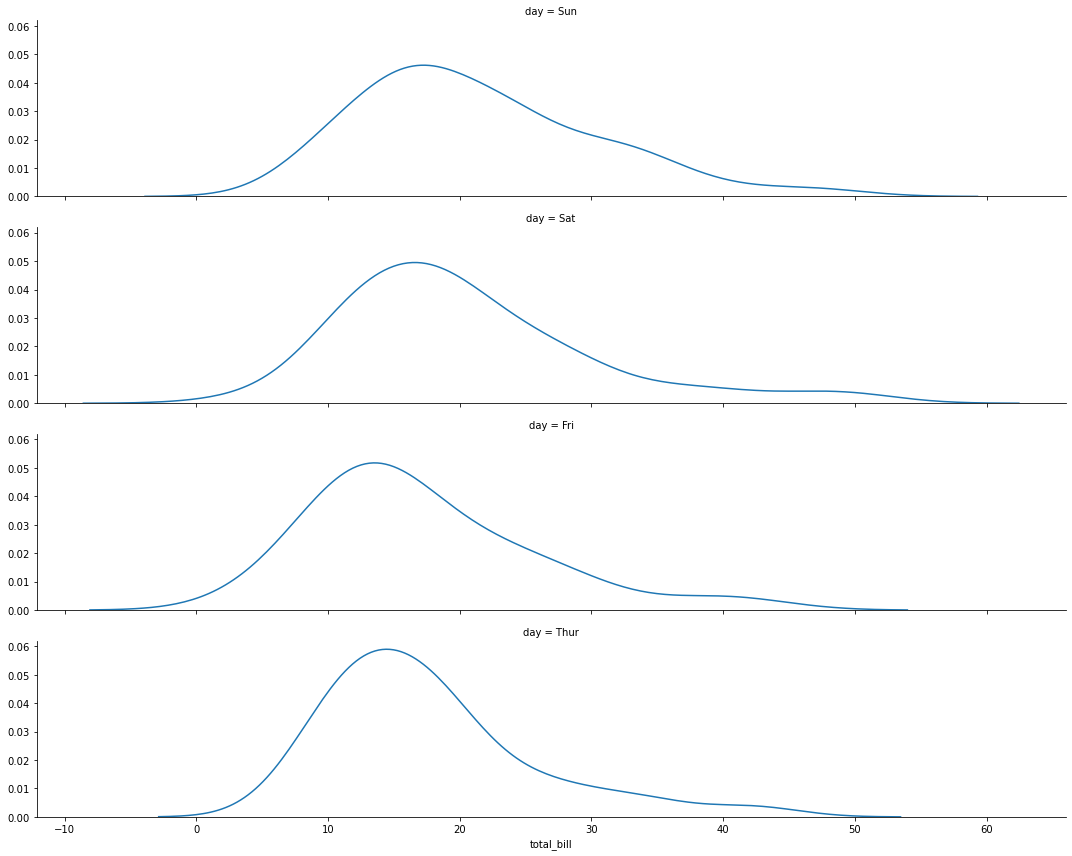

In [19]:
g = sns.FacetGrid(tips, row = 'day', height = 3, aspect = 5, row_order = ['Sun', 'Sat', 'Fri', 'Thur'])
g.map(sns.kdeplot, 'total_bill')

Use **`dict`** to map scale color to a particular value

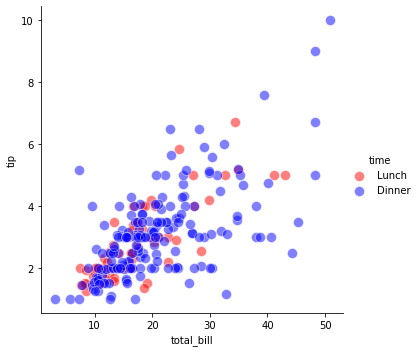

In [25]:
pal = dict(Lunch = 'red', Dinner = 'blue')
g = sns.FacetGrid(tips, hue = 'time', palette = pal, height = 5)
g.map(sns.scatterplot, 'total_bill', 'tip', s = 100, alpha = .5)
g.add_legend()

Manipulate figure at high level abstraction:  
- **`FacetGrid.set()`**: most common (everything you set here will apply for every single axes inside, if you want to customize each axes separately, access **`FacetGrid.axes`**)
- **`FacetGrid.set_axis_labels()`**

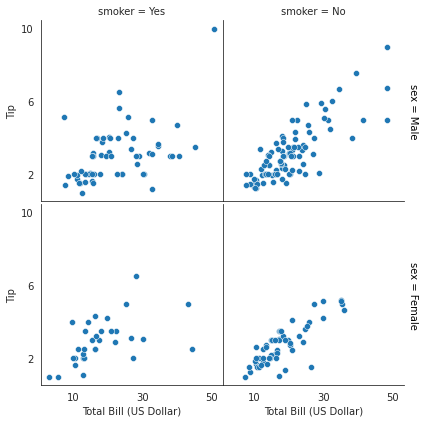

In [34]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, margin_titles = True, col = 'smoker', row = 'sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.set_axis_labels('Total Bill (US Dollar)', 'Tip')
g.set(xticks = [10, 30, 50], yticks = [2, 6, 10])
g.fig.subplots_adjust(wspace = 0, hspace = 0.02)

For even more customization, you can work directly with the underling matplotlib figure and **`axes`** objects, which are stored as member attributes at **`fig`** and **`axes`** (a two-dimensional array), respectively. When making a figure without row or column faceting, you can also use the ax attribute to directly access the single **`axes`**.

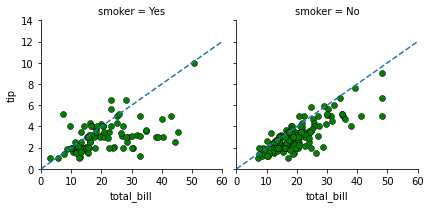

In [37]:
g = sns.FacetGrid(tips, col = 'smoker')
g.map(sns.scatterplot, 'total_bill', 'tip', color = 'green', lw = 1, ec = 'k')

for ax in g.axes.flat:
    ax.axline((0, 0), slope = .2, ls = '--')
    
g.set(xlim = (0, 60), ylim = (0, 14))

# Using custom functions

<b style = 'color:red'>Warning: This is very important, make sure you fully understand it to know the internal working of `FacetGrid`</b>  
To see the priciples, see the tutorial link at the top of this notebook

# Plotting pair-wise data relationship (`sns.PairGrid`)

In [43]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


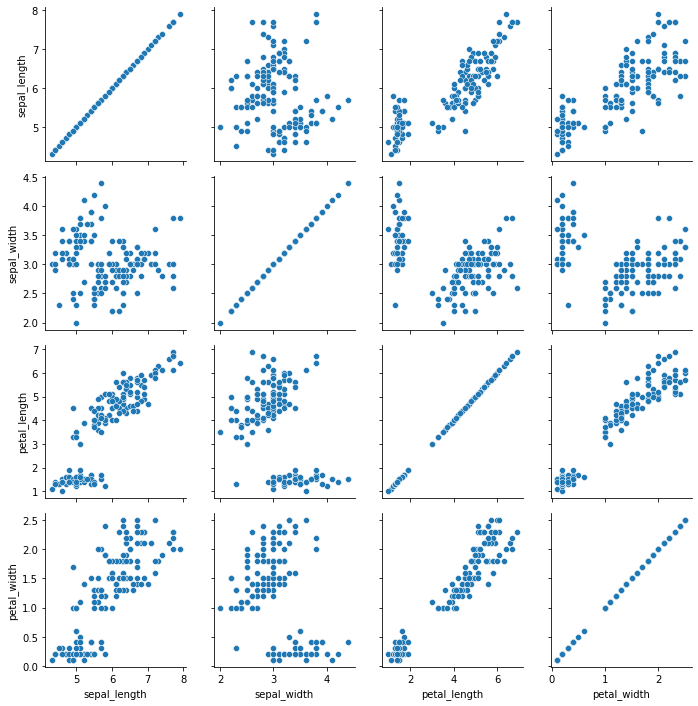

In [44]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

It’s possible to plot a different function on the diagonal to show the univariate distribution of the variable in each column. Note that the axis ticks won’t correspond to the count or density axis of this plot, though.

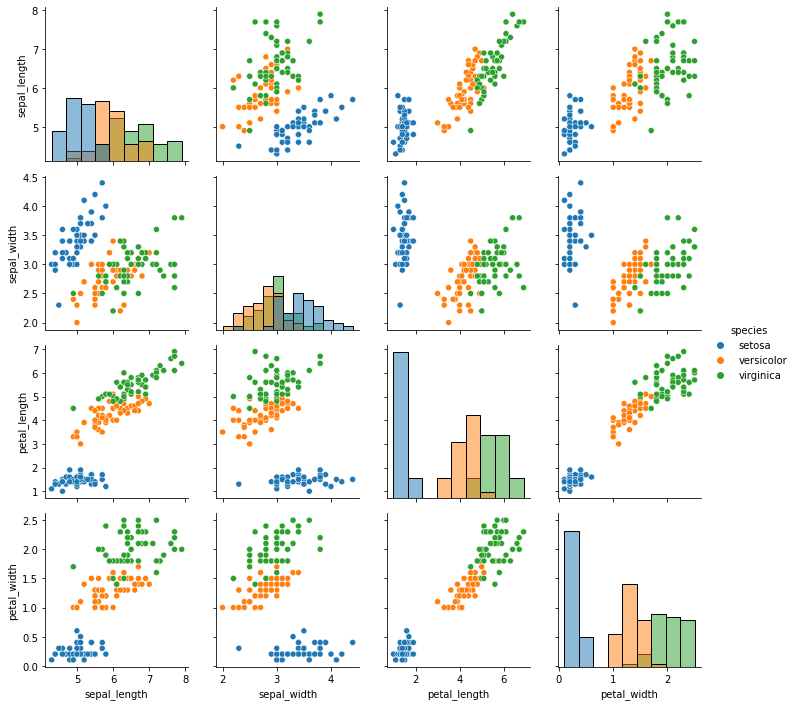

In [48]:
g = sns.PairGrid(iris, hue = 'species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

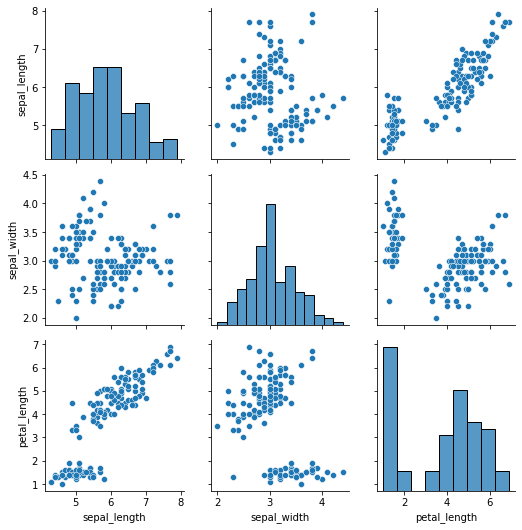

In [49]:
g = sns.PairGrid(iris, vars = ['sepal_length', 'sepal_width', 'petal_length'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

It’s also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

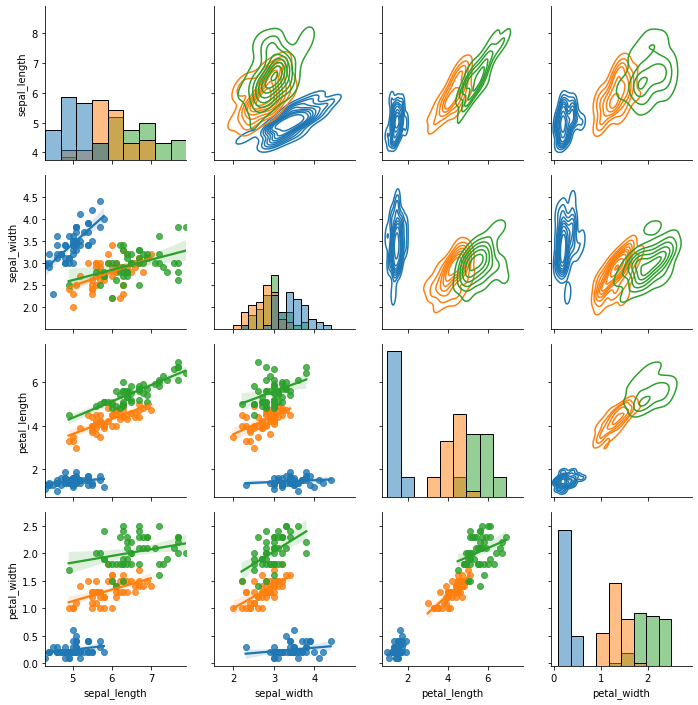

In [53]:
g = sns.PairGrid(iris, hue = 'species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.regplot)

The square grid with identity relationships on the diagonal is actually just a special case, and you can plot with different variables in the rows and columns.

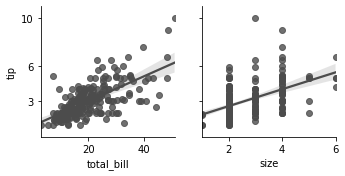

In [56]:
g = sns.PairGrid(tips, x_vars = ['total_bill', 'size'], y_vars = 'tip')
g.map(sns.regplot, color = '.3')
g.set(ylim = (0, 11), yticks = (3, 6, 10))

**`PairGrid`** is flexible, but to take a quick look at a dataset, it can be easier to use **`pairplot()`**. This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

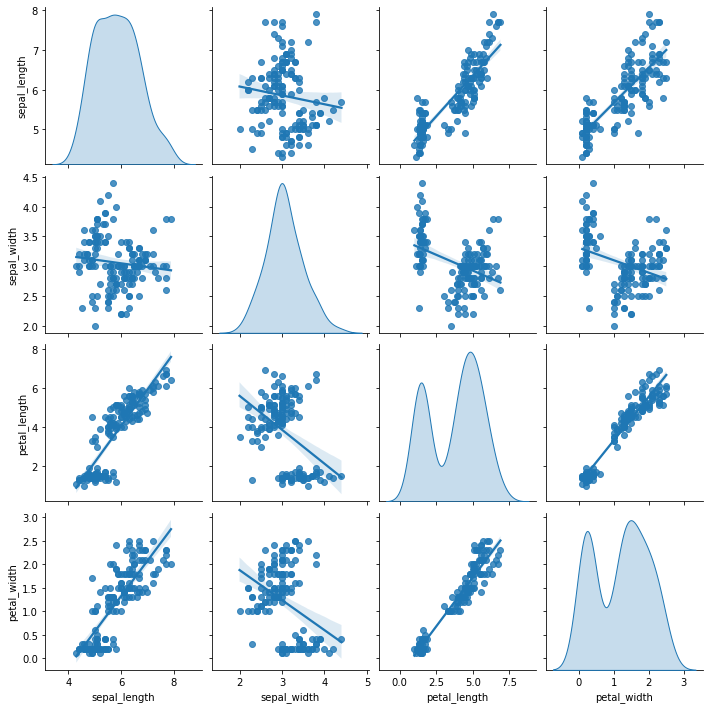

In [58]:
sns.pairplot(iris, kind = 'reg', diag_kind = 'kde')

You can also control the aesthetics of the plot with keyword arguments, and it returns the **`PairGrid`** instance for further tweaking.

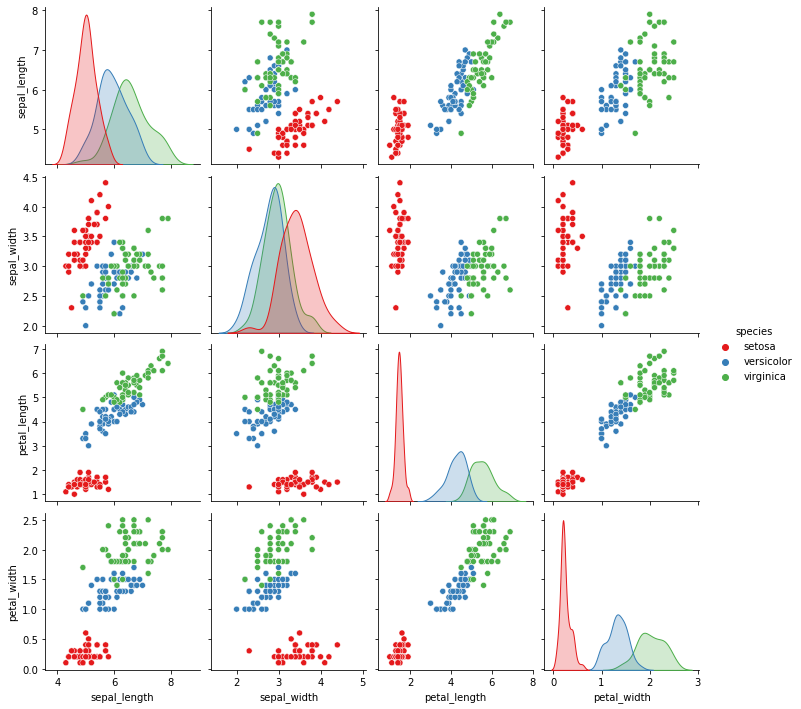

In [60]:
g = sns.pairplot(iris, hue = 'species', palette = 'Set1')

# Marginal plot(`sns.JointPlot`)

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/trung/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


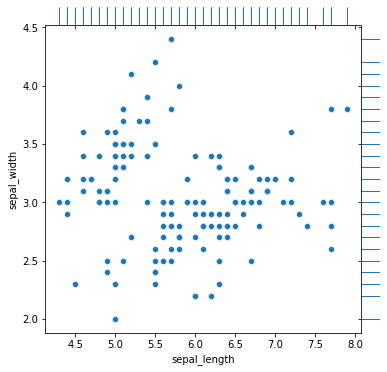

In [9]:
g = sns.JointGrid(data = iris, x = 'sepal_length', y = 'sepal_width', space=0, ratio=17)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.rugplot, height=1)

In [10]:
?sns.JointGrid

Init signature:
sns.JointGrid(
    *,
    x=None,
    y=None,
    data=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    size=None,
    marginal_ticks=False,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
)
Docstring:     
Grid for drawing a bivariate plot with marginal univariate plots.

Many plots can be drawn by using the figure-level interface :func:`jointplot`.
Use this class directly when you need more flexibility.
Init docstring:
Set up the grid of subplots and store data internally for easy plotting.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
height : number
    Size of each side of the 